In [69]:
using FastAI, ImageShow
_show(reg) = show(IOContext(stdout, :displaysize => (60, 80)), reg)

_show (generic function with 1 method)

# Feature registries in FastAI.jl

## Datasets

In [70]:
datasets() |> _show

Registry(Datasets, 67 entries)

  ID                                        Name                                    Size     Is downloaded  Tags      Description                               Dataset loader      Package  
  :id                                       :name                                   :size    :downloaded    :tags     :description                              :loader             :package 

  fastai/CUB_200_2011                       CUB_200_2011                            1GiB     ⨯              String[]  missing                                   DataDepLoader(...)  FastAI  
                                                                                                                                                                                            

  fastai/bedroom                            bedroom                                 4.25GiB  ⨯              String[]  missing                                   DataDepLoader(...)  FastAI  
                   

We can get more information on a specific dataset:

In [71]:
datasets()["fastai/imagewoof2-160"] |> _show

RegistryEntry(
                                                                                        
          id  =  fastai/imagewoof2-160                  (String)                       
                                                      
        name  =  imagewoof2-160                         (String)                       
                                                      
        size  =  missing                                (String)                       
                                                      
  downloaded  =  ✔                                      (Bool)                         
                                                      
        tags  =  String[]                               (Vector{String})               
                                                      
                                                      
 description  =    A subset of 10 harder to classify    (String)                       
                   classes from Imagen

And load it, triggering a lazy download:

In [72]:
load(datasets()["fastai/imagewoof2-160"])

"/Users/lorenz/.julia/datadeps/fastai-imagewoof2-160"

## Dataset recipes

Of course, to load datasets into a format that we can work with, FastAI.jl has so-called "dataset recipes".

In [73]:
datarecipes() |> _show

Registry(Dataset recipes, 29 entries)

  ID                          Dataset ID                  Block types             Description   Is downloaded  Package         Recipe                        
  :id                         :datasetid                  :blocks                 :description  :downloaded    :package        :recipe                       

  vision/CUB_200_2011         fastai/CUB_200_2011         (Image{2}, Label)       missing       ⨯              FastAI.Vision   ImageFolders(...)
                                                                                                                             

  vision/imagenette           fastai/imagenette           (Image{2}, Label)       missing       ⨯              FastAI.Vision   ImageFolders(...)
                                                                                                                             

  vision/imagenette2          fastai/imagenette2          (Image{2}, Label)       missing       ⨯   

We can likewise look at an entry:

In [74]:
(recipe = datarecipes()["vision/imagewoof2-160"]) |> _show

RegistryEntry(
                                                                        
          id  =  vision/imagewoof2-160  (String)                       
                                      
   datasetid  =  fastai/imagewoof2-160  (String)                       
                                      
      blocks  =  (Image{2}, Label)      (Any)                          
                                      
 description  =  missing                (String)                       
  downloaded  =  ✔                      (Bool)                         
                                      
     package  =  FastAI.Vision          (Module)                       
                                      
                                      
      recipe  =  ImageFolders(...)      (FastAI.Datasets.DatasetRecipe)

)

And load it, giving us a ready-to-use data container and blocks:

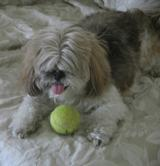

In [75]:
data, blocks = load(recipe)
getobs(data, 1)[1]

## Learning tasks

Finally, learning tasks can also be listed:

In [76]:
learningtasks() |> _show

Registry(Learning tasks, 6 entries)

  ID                        Name                                   Block types             Category    Description                               Learning task                             Package        
  :id                       :name                                  :blocks                 :category   :description                              :constructor                              :package       

  vision/imageclfmulti      Image classification (multi-label)     (Image, LabelMulti)     supervised    Multi-label image classification task…  ImageClassificationMulti (generic funct…  FastAI.Vision 
                                                                                                                                                                                                         

  vision/imagekeypoint      Image keypoint regression              (Image, Keypoints)      supervised    Keypoint regression task with a fixed…  ImageK

In [77]:
learningtasks()["vision/imageclfsingle"] |> _show

RegistryEntry(
                                                                                       
          id  =  vision/imageclfsingle                                        (String)
                                                                            
        name  =  Image classification (single-label)                          (String)
                                                                            
      blocks  =  (Image, Label)                                               (Any)   
                                                                            
    category  =  supervised                                                   (String)
                                                                            
 description  =    Single-label image classification                          (String)
                   task where every image has a single                      
                   class label associated with it.                          


In [78]:
task = load(learningtasks()["vision/imageclfsingle"])(blocks; size = (200, 200))

SupervisedTask(Image{2} -> Label{String})

In [79]:
learner = tasklearner(task, data)

Learner()

## Finding features

Aside from listing a big table with features, we can also find entries that are relevant to us.

For example, **find all the datasets that have already been downloaded:**

In [83]:
datasets(downloaded=true, description=!ismissing) |> _show

Registry(Datasets, 2 entries)

  ID                      Name             Size     Is downloaded  Tags      Description                               Dataset loader      Package  
  :id                     :name            :size    :downloaded    :tags     :description                              :loader             :package 

  fastai/imagenette2-160  imagenette2-160  missing  ✔              String[]    A subset of 10 easily classified clas…  DataDepLoader(...)  FastAI  
                                                                                                                                                   

  fastai/imagewoof2-160   imagewoof2-160   missing  ✔              String[]    A subset of 10 harder to classify cla…  DataDepLoader(...)  FastAI  
                                                                                                                                                   



**Find all dataset recipes with classification targets:**

In [65]:
datarecipes(blocks=(Any, Label)) |> _show

Registry(Dataset recipes, 24 entries)

  ID                          Dataset ID                  Block types        Description   Is downloaded  Package        Recipe            
  :id                         :datasetid                  :blocks            :description  :downloaded    :package       :recipe           

  vision/CUB_200_2011         fastai/CUB_200_2011         (Image{2}, Label)  missing       ⨯              FastAI.Vision  ImageFolders(...)
                                                                                                                       

  vision/imagenette           fastai/imagenette           (Image{2}, Label)  missing       ⨯              FastAI.Vision  ImageFolders(...)
                                                                                                                       

  vision/imagenette2          fastai/imagenette2          (Image{2}, Label)  missing       ⨯              FastAI.Vision  ImageFolders(...)
                     

**Find all learning tasks with image inputs:**

In [67]:
learningtasks(blocks=(Image, Any)) |> _show

Registry(Learning tasks, 4 entries)

  ID                        Name                                 Block types          Category    Description                               Learning task                             Package       
  :id                       :name                                :blocks              :category   :description                              :constructor                              :package      

  vision/imageclfmulti      Image classification (multi-label)   (Image, LabelMulti)  supervised    Multi-label image classification task…  ImageClassificationMulti (generic funct…  FastAI.Vision
                                                                                                                                                                                                   

  vision/imagekeypoint      Image keypoint regression            (Image, Keypoints)   supervised    Keypoint regression task with a fixed…  ImageKeypointRegression (generic fu

## Outlook

This work will support other future efforts:

- **Domain libraries**: make it easy for third-party libraries to contribute features (datasets, recipes, models, tasks, encodings...) and easy for users to discover these features.
- **No-code interfaces**: having a consistent way to search for features and relating them to relevant `Block`s makes it possible to build no-code, dropdown-based interfaces to choose an appropriate dataset, find a learning task, or build a model for a task; and finally, train a model.